<h1>Data Jobs  Analysis</h1>

<h2>Phase 1: Data Analysis</h2>

<h3>Step 1: Loading Data</h3>

In [2]:
#Importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv(r"data_jobs.csv")
data.head()

,title,company,location,link,description
0,Postdoctoral Research Scientist – Columbia Uni...,"Columbia University, Data Science Institute",New York City,https://datajobs.com/Columbia-University-Data-...,The Data Science Institute (DSI) at Columbia U...
1,Nuclear & Radiological Thread Detection Data S...,Hopkins Extreme Materials Institute,"Fort Belvoir, VA",https://datajobs.com/Hopkins-Extreme-Materials...,"TO APPLY, PLEASE VISIT: https://hemi.jhu.edu/h..."
2,People Analytics - Data Science & Reporting An...,The D. E. Shaw Group,New York City,https://datajobs.com/the-D-E-Shaw-Group/People...,OVERVIEW:\nThe D. E. Shaw group seeks a data s...
3,Lead Data Scientist – The Ohio State University,The Ohio State University,"Columbus, OH",https://datajobs.com/the-Ohio-State-University...,Department:\nPublic Health | Center for Health...
4,Lead Data Science Engineer – DraftKings,DraftKings,Remote,https://datajobs.com/DraftKings/Lead-Data-Scie...,BE THE STRATEGY BEHIND THE GAME.\nWe are seeki...


<h3>Step 2: Data Pre-processing</h3>

In [4]:
# Handling Missing Values
data['location'].fillna('Unknown', inplace=True)
data.head()

,title,company,location,link,description
0,Postdoctoral Research Scientist – Columbia Uni...,"Columbia University, Data Science Institute",New York City,https://datajobs.com/Columbia-University-Data-...,The Data Science Institute (DSI) at Columbia U...
1,Nuclear & Radiological Thread Detection Data S...,Hopkins Extreme Materials Institute,"Fort Belvoir, VA",https://datajobs.com/Hopkins-Extreme-Materials...,"TO APPLY, PLEASE VISIT: https://hemi.jhu.edu/h..."
2,People Analytics - Data Science & Reporting An...,The D. E. Shaw Group,New York City,https://datajobs.com/the-D-E-Shaw-Group/People...,OVERVIEW:\nThe D. E. Shaw group seeks a data s...
3,Lead Data Scientist – The Ohio State University,The Ohio State University,"Columbus, OH",https://datajobs.com/the-Ohio-State-University...,Department:\nPublic Health | Center for Health...
4,Lead Data Science Engineer – DraftKings,DraftKings,Remote,https://datajobs.com/DraftKings/Lead-Data-Scie...,BE THE STRATEGY BEHIND THE GAME.\nWe are seeki...


In [7]:
# Feature Engineering
def extract_seniority(title):
    title = title.lower()
    if any(word in title for word in ['senior', 'sr', 'lead', 'principal']):
        return 'Senior'
    elif any(word in title for word in ['junior', 'jr', 'entry']):
        return 'Junior'
    elif 'intern' in title:
        return 'Intern'
    else:
        return 'Mid'

data['seniority'] = data['title'].apply(extract_seniority)

data.tail()

,title,company,location,link,description,seniority
508,SharePoint Architect / Software Engineer – Blu...,BlueMetal,"Watertown, MA",https://datajobs.com/BlueMetal/SharePoint-Arch...,YOU \nare an excellent SharePoint engineer or ...,Mid
509,Senior Business Intelligence Developer – Vista...,Vistaprint,"Lexington, MA",https://datajobs.com/Vistaprint/Senior-Busines...,As a \nSenior\n \nBusiness Intelligence Develo...,Senior
510,BI Application Engineer – Contant Contact,Contant Contact,"Waltham, MA",https://datajobs.com/Contant-Contact/BI-Applic...,Do you like a challenge? Are you an experience...,Mid
511,SharePoint Architect / Software Engineer – Blu...,BlueMetal,"Watertown, MA",https://datajobs.com/BlueMetal/SharePoint-Arch...,YOU \nare an excellent SharePoint engineer or ...,Mid
512,Senior Business Intelligence Developer – Vista...,Vistaprint,"Lexington, MA",https://datajobs.com/Vistaprint/Senior-Busines...,As a \nSenior\n \nBusiness Intelligence Develo...,Senior


In [15]:
def extract_skills(description):
    skills = []
    keywords = ['python','r','sql','java','c++','machine learning','data analysis','deep learning','statistical modeling','data visualization','natural language processing (nlp)','big data technologies','business intelligence (bi) tools','predictive analytics','data mining','time series analysis','computer vision','neural networks','ai development','regression analysis'
             ]

    description = description.lower()
    for keyword in keywords:
        if keyword in description:
            skills.append(keyword)
    return ', '.join(skills)

data['key_skills'] = data['description'].apply(extract_skills)

data.head()

,title,company,location,link,description,seniority,key_skills
0,Postdoctoral Research Scientist – Columbia Uni...,"Columbia University, Data Science Institute",New York City,https://datajobs.com/Columbia-University-Data-...,The Data Science Institute (DSI) at Columbia U...,Mid,"r, machine learning"
1,Nuclear & Radiological Thread Detection Data S...,Hopkins Extreme Materials Institute,"Fort Belvoir, VA",https://datajobs.com/Hopkins-Extreme-Materials...,"TO APPLY, PLEASE VISIT: https://hemi.jhu.edu/h...",Mid,r
2,People Analytics - Data Science & Reporting An...,The D. E. Shaw Group,New York City,https://datajobs.com/the-D-E-Shaw-Group/People...,OVERVIEW:\nThe D. E. Shaw group seeks a data s...,Mid,"python, r, data visualization"
3,Lead Data Scientist – The Ohio State University,The Ohio State University,"Columbus, OH",https://datajobs.com/the-Ohio-State-University...,Department:\nPublic Health | Center for Health...,Senior,"r, data analysis"
4,Lead Data Science Engineer – DraftKings,DraftKings,Remote,https://datajobs.com/DraftKings/Lead-Data-Scie...,BE THE STRATEGY BEHIND THE GAME.\nWe are seeki...,Senior,"python, r, java, c++, machine learning, data a..."


<h3>Step 3: Expolatory Data Analysis(EDA)</h3>

<h4>3.1: Distribution of Jobs Across Entities</h4>

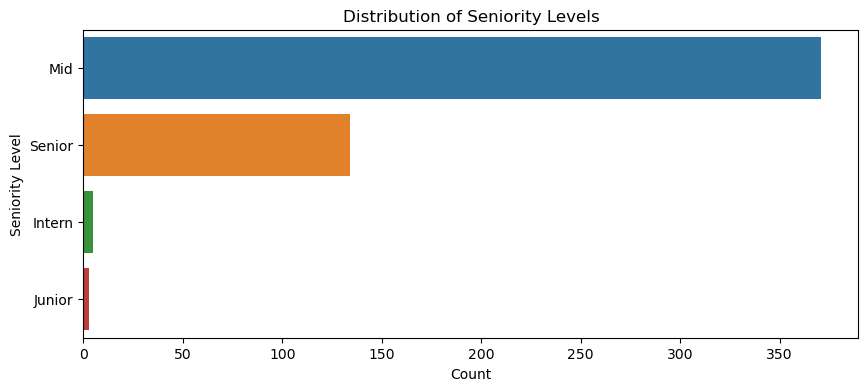

In [24]:

# Plotting the distribution of seniority levels
plt.figure(figsize=(10, 4))
sns.countplot(y='seniority',data=data, order=data['seniority'].value_counts().index[:10])
plt.title('Distribution of Seniority Levels')
plt.ylabel('Seniority Level')
plt.xlabel('Count')
plt.show()


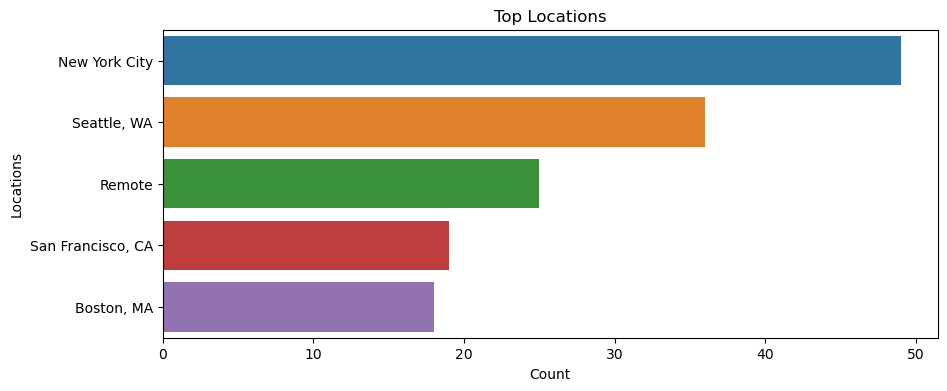

In [26]:

# Plotting the distribution of seniority levels
plt.figure(figsize=(10, 4))
sns.countplot(y='location',data=data, order=data['location'].value_counts().index[:5])
plt.title('Top Locations')
plt.ylabel('Locations')
plt.xlabel('Count')
plt.show()

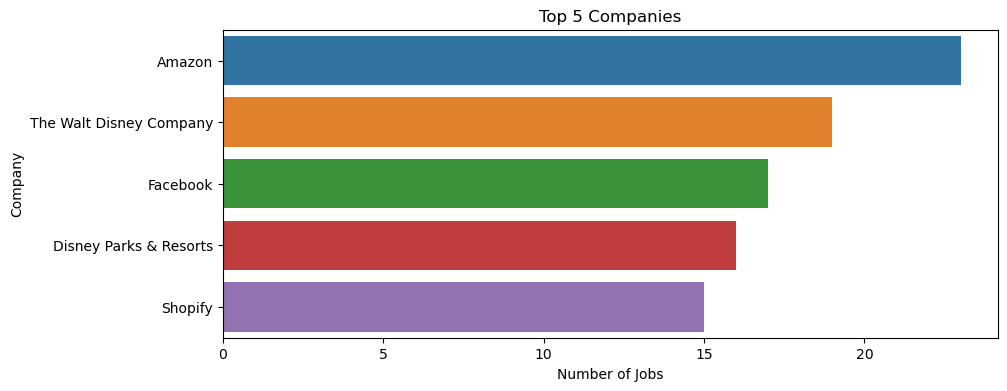

In [28]:
# Plotting the distribution of seniority levels
plt.figure(figsize=(10, 4))
sns.countplot(y='company',data=data, order=data['company'].value_counts().index[:5])
plt.title('Top 5 Companies')
plt.ylabel('Company')
plt.xlabel('Number of Jobs')
plt.show()

<h3>Word Cloud for Job Descriptions</h3>

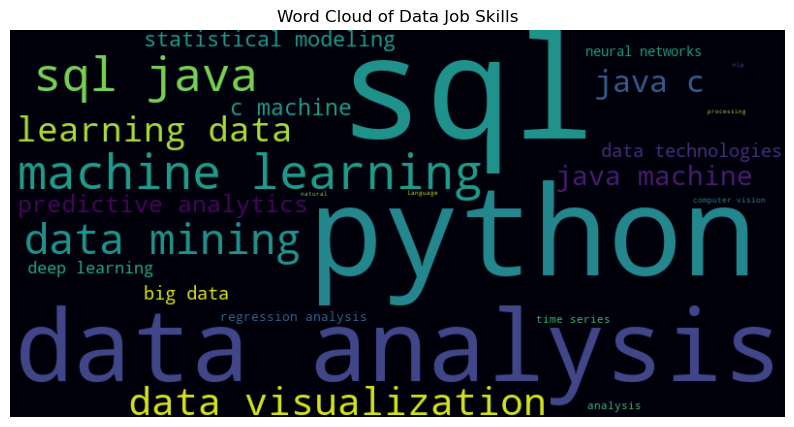

In [38]:
from wordcloud import WordCloud
# Combine all descriptions into a single string
text = ' '.join(data['key_skills'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='#00000B', colormap='viridis', max_words=50).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Data Job Skills')
plt.show()

<h3>Plotting Most Frequenctly Occurring Skills</h3>

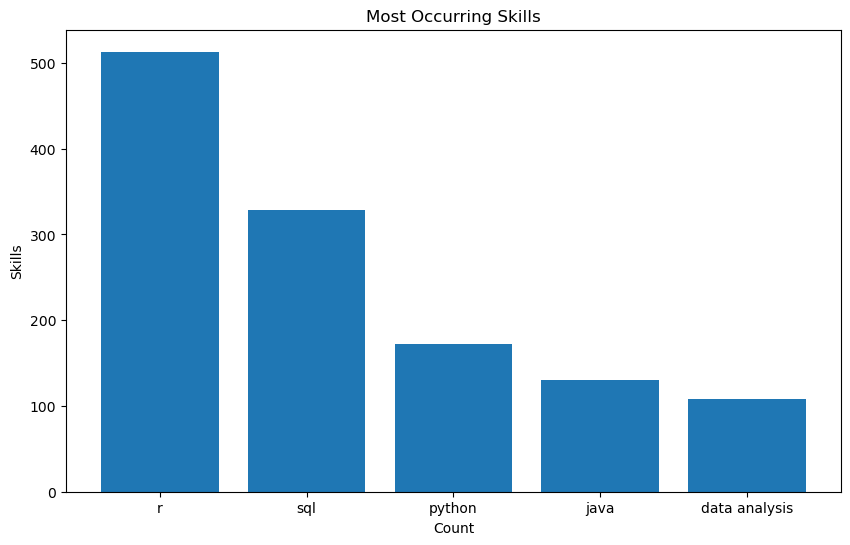

In [48]:
from collections import Counter
#Function to extract skills from a string
def extract_skills(text):
    return [skill.strip() for skill in text.split(',')]

# Extract skills from all entries in 'key_skills' column
all_skills = data['key_skills'].apply(extract_skills).sum()

# Count frequencies of each skill
skill_counts = Counter(all_skills)

# Extract the most common skills and their counts
top_skills = skill_counts.most_common(5)  # Change 5 to the number of top skills you want to plot

# Prepare data for plotting
skills, counts = zip(*top_skills)

# Plotting the most occurring skills
plt.figure(figsize=(10, 6))
plt.bar(skills, counts)
plt.xlabel('Count')
plt.ylabel('Skills')
plt.title('Most Occurring Skills')
plt.show()

<h3>Correlation Matrix</h3>

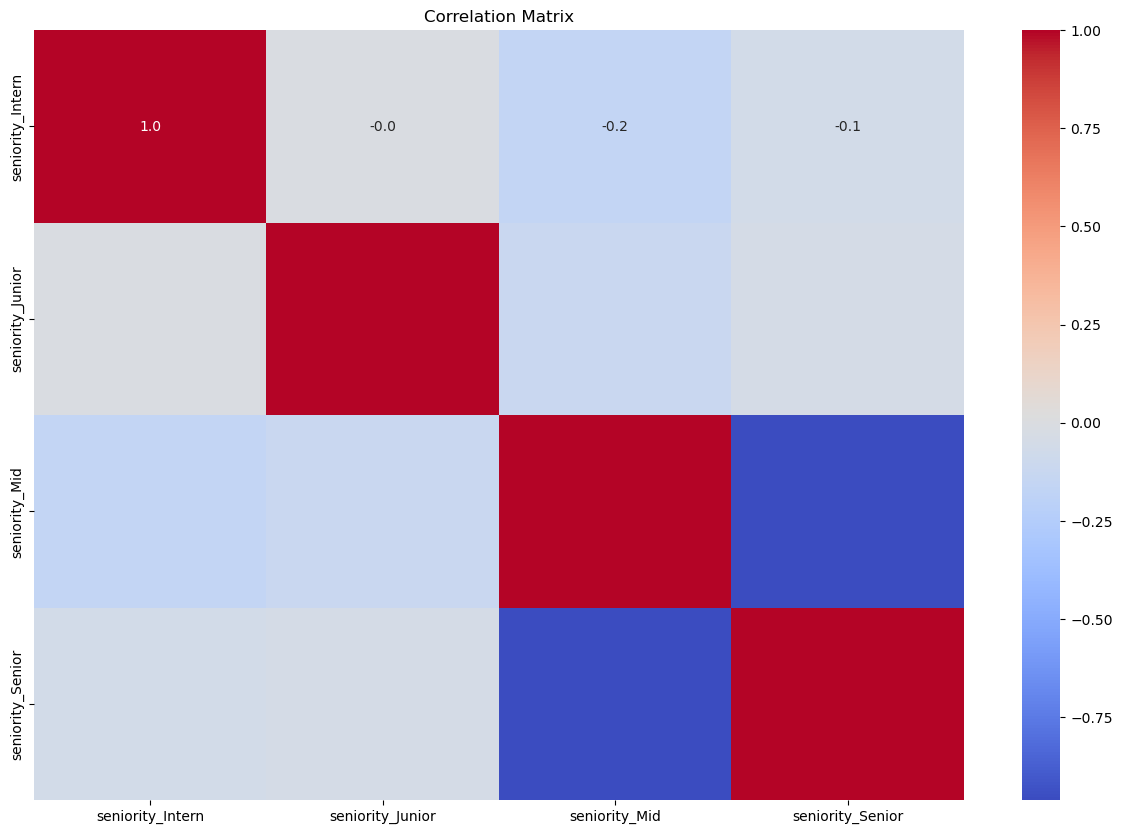

In [40]:
data_encoded = pd.get_dummies(data, columns=['seniority'])
# Dropping less relevant columns for feature selection
data_encoded.drop(['title', 'company', 'location', 'link', 'description', 'key_skills'], axis=1, inplace=True)

# Correlation Matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<h2>Saving the final Data Jobs Datase</h2>

In [41]:
data.to_csv('Data Jobs Dataset.csv', index=False)